In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [5]:
import pandas as pd
df =pd.concat([X,y],axis =1)

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [7]:
df.shape

(45211, 17)

In [8]:
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

***As there are high proportion of null values in Education,Contact and Poutcome Features removing them can be a appropriate thing.Imputation might not be reliable with such a high percentage of missing data.
Considering the job column we can remove the null values ***

In [9]:
df = df.drop(columns = ['education','contact','poutcome'],axis = 1)

In [10]:
df = df.rename(columns = {'y':'Target'})

In [11]:
df.columns

Index(['age', 'job', 'marital', 'default', 'balance', 'housing', 'loan',
       'day_of_week', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'Target'],
      dtype='object')

In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

age            0
job            0
marital        0
default        0
balance        0
housing        0
loan           0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
Target         0
dtype: int64

# Univaraite Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

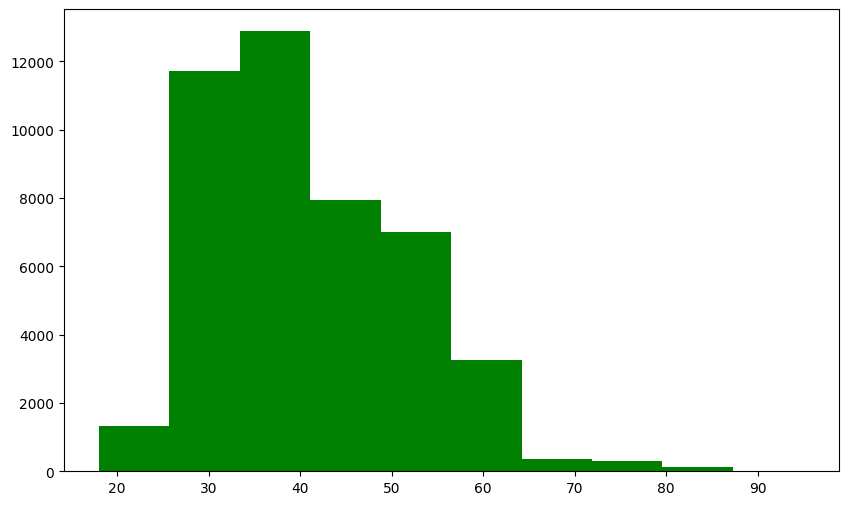

In [15]:
plt.figure(figsize = (10,6))
plt.hist(x = 'age',data = df,bins = 10,color = 'green',histtype ='barstacked',orientation='vertical')
plt.show()

# From the above histogram the maximum people are between 35 to 40

In [16]:
df.columns

Index(['age', 'job', 'marital', 'default', 'balance', 'housing', 'loan',
       'day_of_week', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'Target'],
      dtype='object')

In [17]:
job_count_df = df.groupby('job').size().reset_index(name = 'count')
job_count_df

,job,count
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938
9,technician,7597


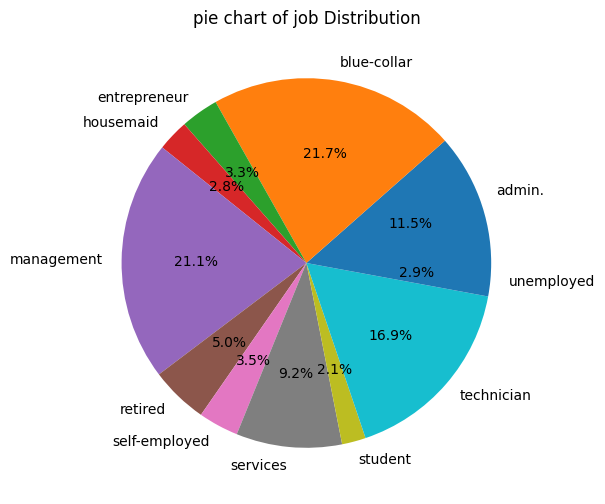

In [18]:
# Simple Pie Chart
plt.figure(figsize=(8,6))
plt.pie(job_count_df['count'],labels = job_count_df['job'],autopct ='%1.1f%%',labeldistance =1.10)
plt.title('pie chart of job Distribution')
plt.show()

In [23]:
marital_df = df.groupby('marital').size().reset_index(name ='count')
marital_df

,marital,count
0,divorced,5190
1,married,27011
2,single,12722


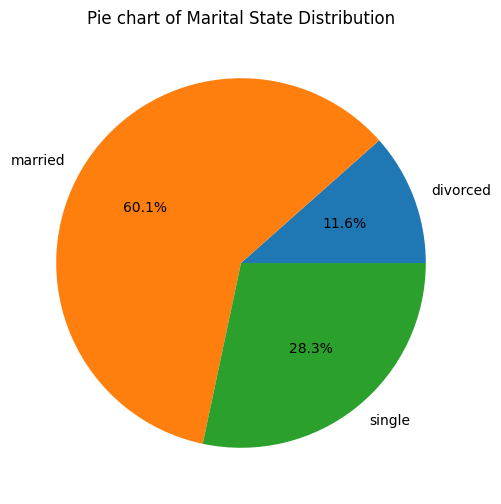

In [28]:
plt.figure(figsize =(8,6))
plt.pie(marital_df['count'],labels = marital_df['marital'],autopct ='%1.1f%%')
plt.title('Pie chart of Marital State Distribution')
plt.show()

In [31]:
default_count = df['default'].value_counts()
default_count

default
no     44110
yes      813
Name: count, dtype: int64

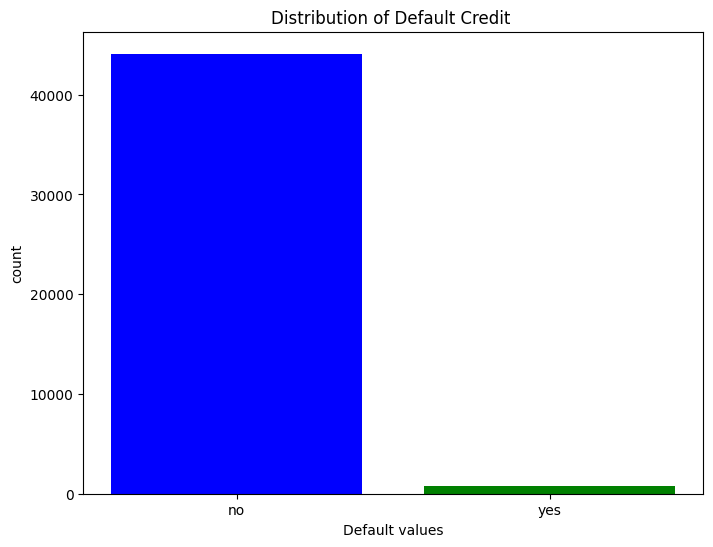

In [51]:
plt.figure(figsize =(8,6))
plt.bar(default_count.index,default_count.values,color = ['blue','green'])
plt.title('Distribution of Default Credit ')
plt.xlabel('Default values')
plt.ylabel('count')
plt.show()

housing
yes    25104
no     19819
Name: count, dtype: int64


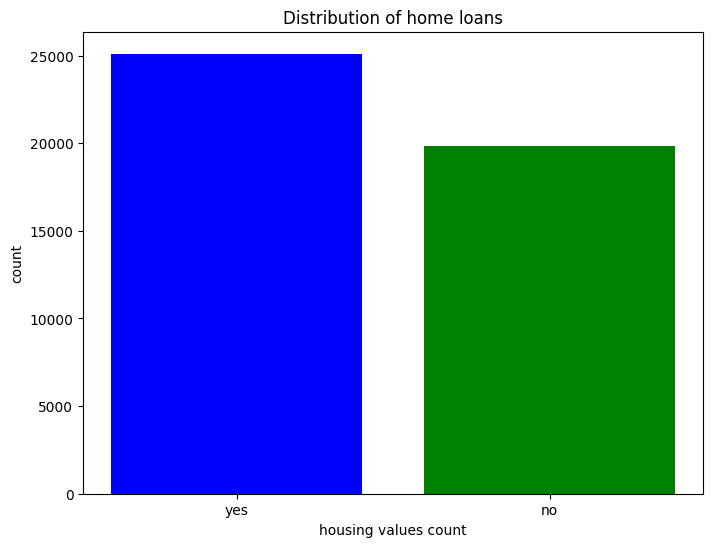

In [55]:
housing_count = df['housing'].value_counts()
print(housing_count)
plt.figure(figsize =(8,6))
plt.bar(housing_count.index,housing_count.values,color = ['blue','green'])
plt.title('Distribution of home loans')
plt.xlabel('housing values count')
plt.ylabel('count')
plt.show()

loan
no     37683
yes     7240
Name: count, dtype: int64


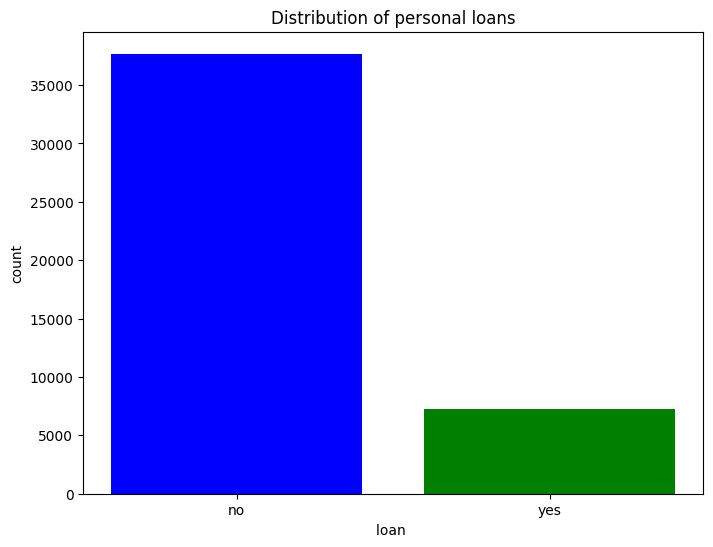

In [56]:
loan_count = df['loan'].value_counts()
print(loan_count)
plt.figure(figsize =(8,6))
plt.bar(loan_count.index,loan_count.values,color = ['blue','green'])
plt.title('Distribution of personal loans')
plt.xlabel('loan ')
plt.ylabel('count')
plt.show()

Target
no     39668
yes     5255
Name: count, dtype: int64


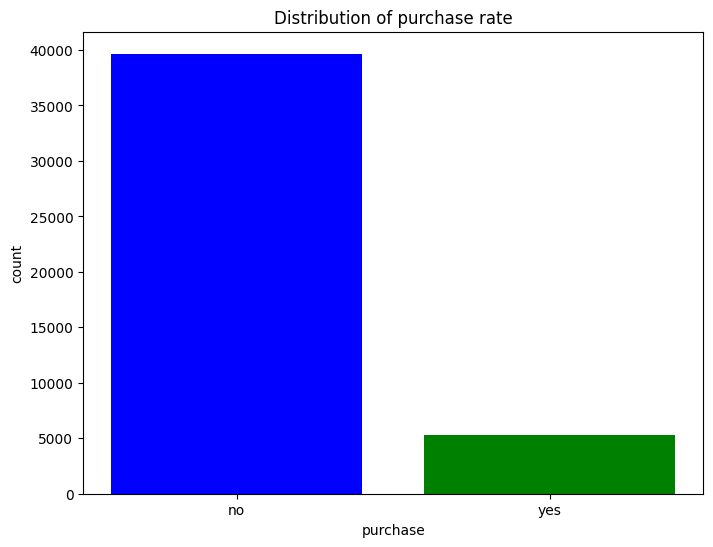

In [57]:
Target_count = df['Target'].value_counts()
print(Target_count)
plt.figure(figsize =(8,6))
plt.bar(Target_count.index,Target_count.values,color = ['blue','green'])
plt.title('Distribution of purchase rate')
plt.xlabel('purchase')
plt.ylabel('count')
plt.show()

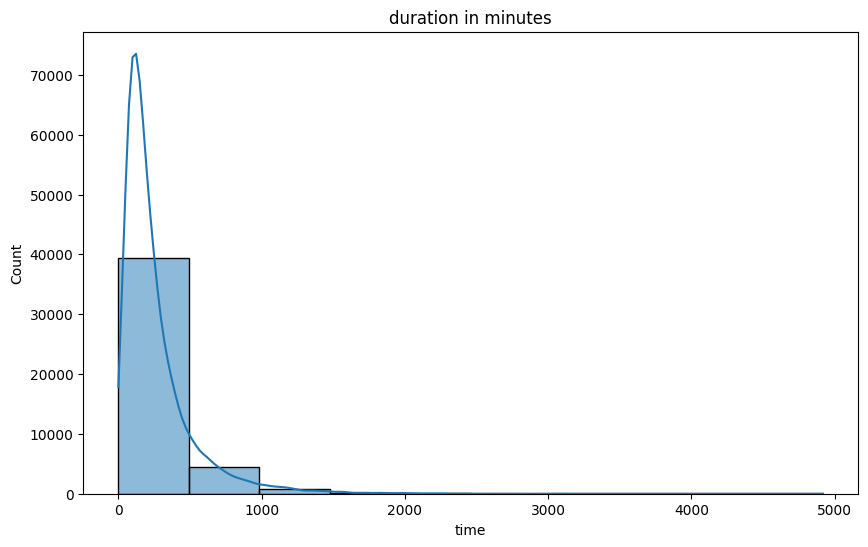

In [61]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'],bins=10, kde=True)
plt.title('duration in minutes')
plt.xlabel('time')
plt.show()

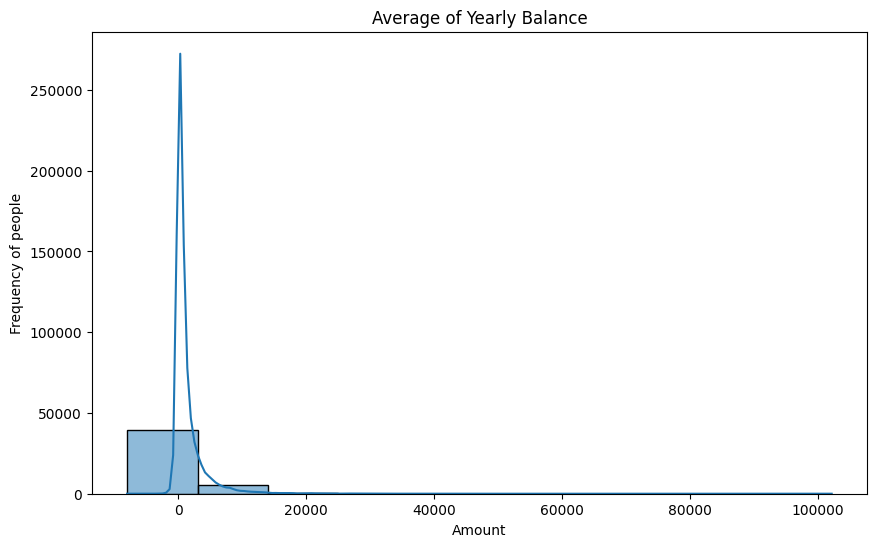

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'],bins=10, kde=True)
plt.title('Average of Yearly Balance')
plt.xlabel('Amount')
plt.ylabel('Frequency of people')
plt.show()

**Some of the Questions for analysis**
1. Is there a relationship between the age of a customer and the likelihood of purchasing a product or service?

2. How does the type of job influence the likelihood of a customer purchasing a product or service?

3. Does marital status affect whether a customer will purchase a product or service?

4. Is there a significant difference in purchasing behavior between customers who have credit defaults and those who do not?

5. Do customers with higher account balances tend to purchase products or services more frequently?

6. Does having a housing loan impact the likelihood of purchasing a product or service?

7. How does having a personal loan affect the purchasing behavior of customers?

8. Does the duration of the last contact with the customer correlate with the likelihood of a purchase?



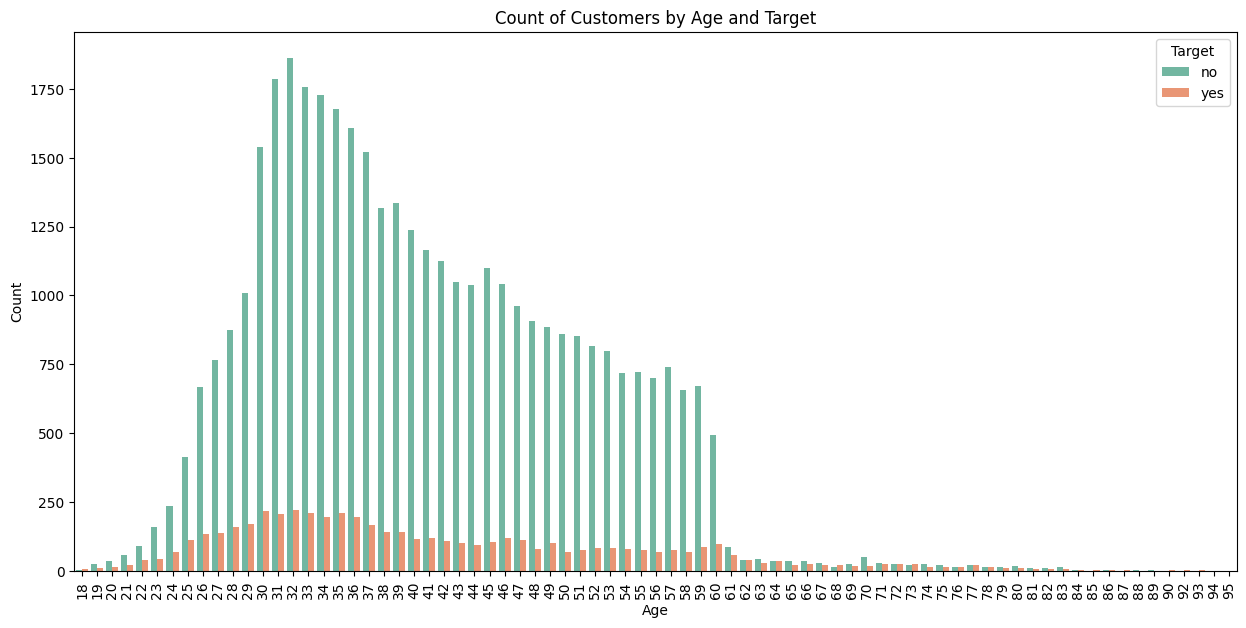

In [109]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='age', hue='Target', palette='Set2')
plt.title('Count of Customers by Age and Target')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.legend(title='Target', loc='upper right')
plt.show()

In [112]:
job_target_count = df.groupby(['job','Target']).size().unstack()
job_target_count

Target,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


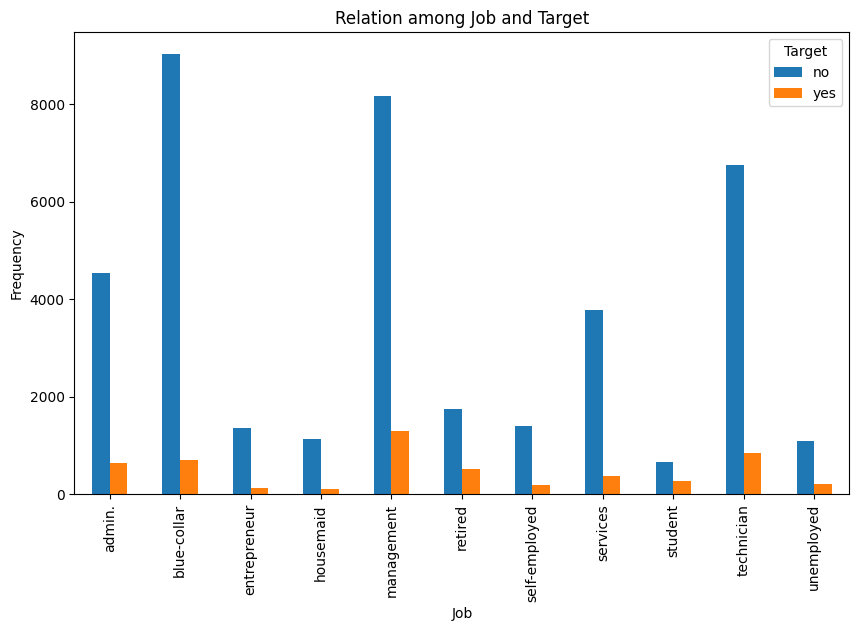

In [114]:
job_target_count.plot(kind ='bar',figsize=(10,6))
plt.title('Relation among Job and Target')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.show()

Target       no   yes
marital              
divorced   4569   621
married   24277  2734
single    10822  1900


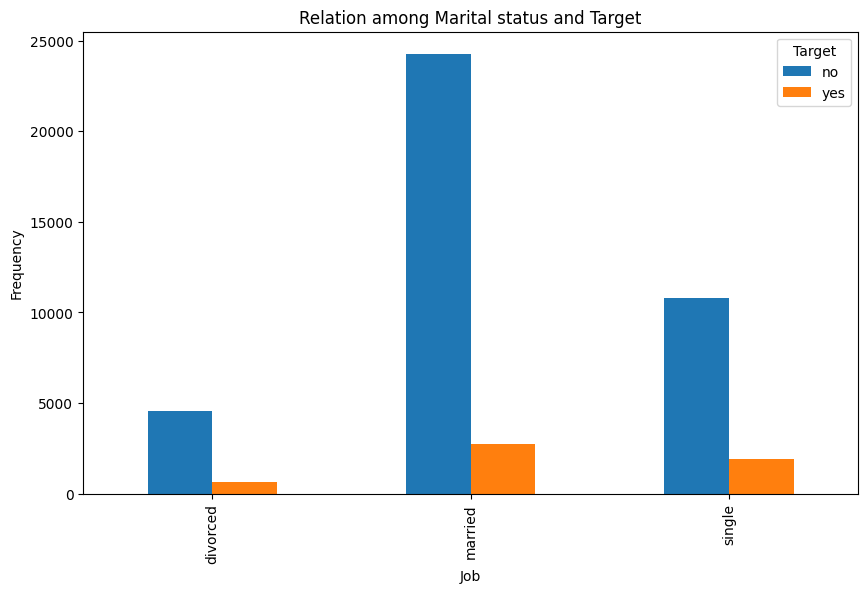

In [119]:
marital_target_count = df.groupby(['marital','Target']).size().unstack()
print(marital_target_count)
marital_target_count.plot(kind ='bar',figsize=(10,6))
plt.title('Relation among Marital status and Target')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.show()

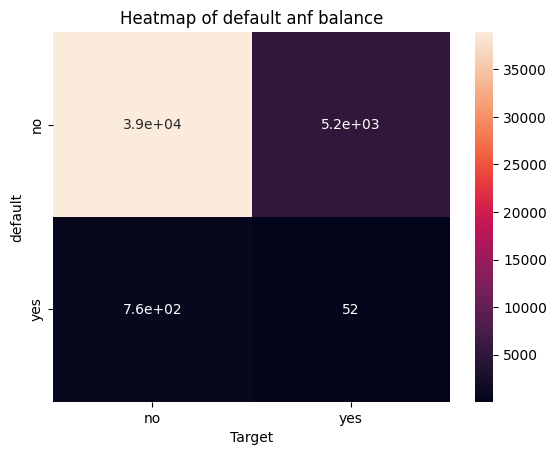

In [127]:
ct = pd.crosstab(df['default'], df['Target'])
sns.heatmap(ct,annot = True)
plt.title('Heatmap of default anf balance')
plt.show()

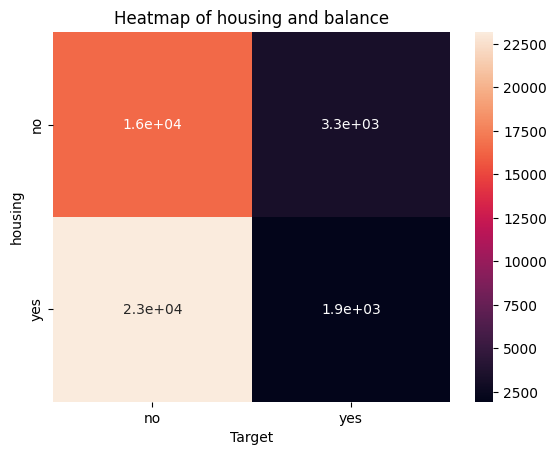

In [129]:
ct = pd.crosstab(df['housing'], df['Target'])
sns.heatmap(ct,annot = True)
plt.title('Heatmap of housing and balance')
plt.show()

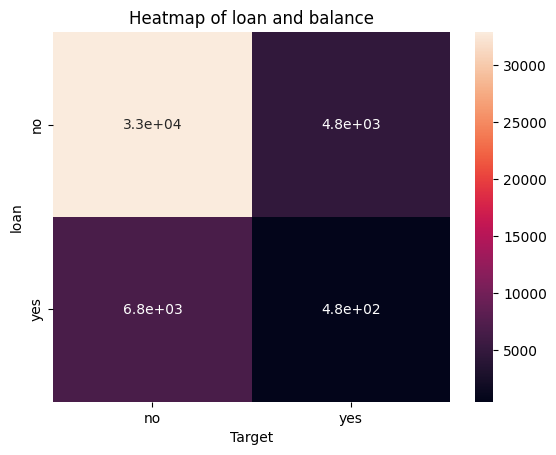

In [128]:
ct = pd.crosstab(df['loan'], df['Target'])
sns.heatmap(ct,annot = True)
plt.title('Heatmap of loan and balance')
plt.show()

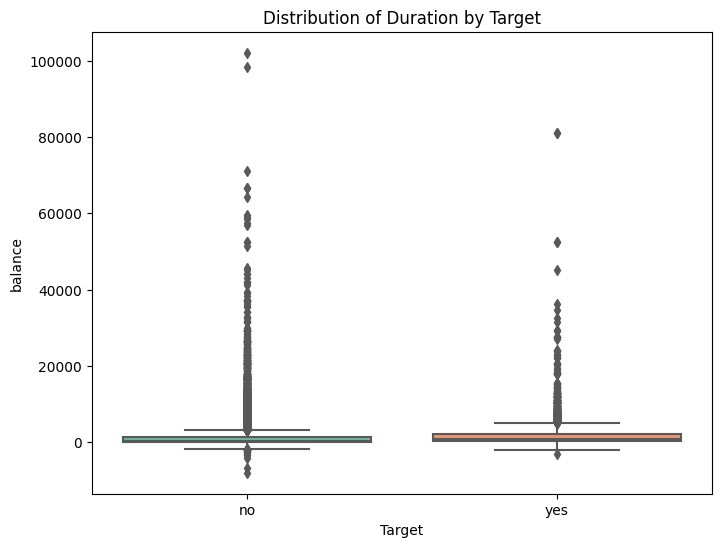

In [135]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Target', y='balance', palette='Set2')
plt.title('Distribution of Duration by Target')
plt.xlabel('Target')
plt.show()

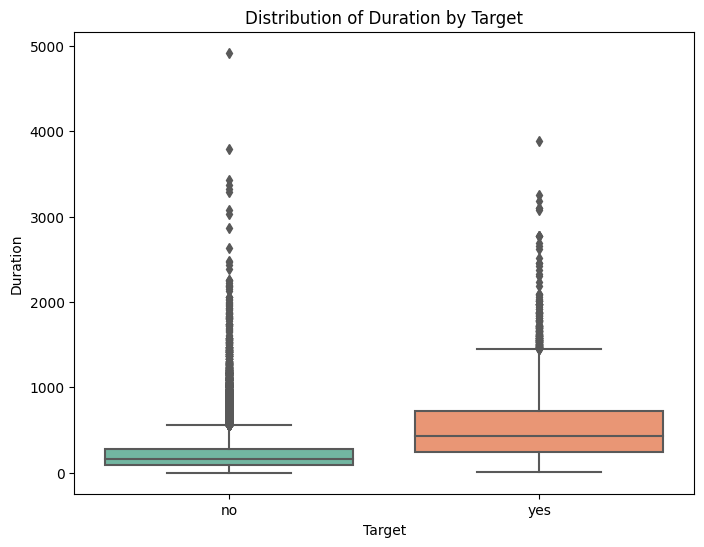

In [133]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Target', y='duration', palette='Set2')
plt.title('Distribution of Duration by Target')
plt.xlabel('Target')
plt.show()

In [138]:
##  print(df['balance'].max())
##  print(df['duration'].max())

102127
4918


In [141]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [143]:
df

,age,job,marital,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,Target
0,58,management,married,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,no,1506,yes,no,5,may,92,1,-1,0,no
5,35,management,married,no,231,yes,no,5,may,139,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,no,668,no,no,17,nov,508,4,-1,0,no


In [144]:
encoder = LabelEncoder()
def encoding(data):
    col = ['job','marital','default','housing','loan','month','Target']
    for cols in col:
        data[cols]=encoder.fit_transform(data[cols].astype(str))
    return data

In [148]:
df = encoding(df)
df.head()

,age,job,marital,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,Target
0,58,7,1,0,2143,1,0,5,4,261,1,-1,0,0
1,44,3,2,0,29,1,0,5,4,151,1,-1,0,0
2,33,5,1,0,2,1,1,5,4,76,1,-1,0,0
3,47,1,1,0,1506,1,0,5,4,92,1,-1,0,0
5,35,7,1,0,231,1,0,5,4,139,1,-1,0,0


In [155]:
X = df.drop(columns = ['Target'])
y = df['Target']
X

,age,job,marital,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous
0,58,7,1,0,2143,1,0,5,4,261,1,-1,0
1,44,3,2,0,29,1,0,5,4,151,1,-1,0
2,33,5,1,0,2,1,1,5,4,76,1,-1,0
3,47,1,1,0,1506,1,0,5,4,92,1,-1,0
5,35,7,1,0,231,1,0,5,4,139,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,1,0,825,0,0,17,5,977,3,-1,0
45207,71,8,0,0,1729,0,0,17,5,456,2,-1,0
45208,72,8,1,0,5715,0,0,17,5,1127,5,184,3
45209,57,1,1,0,668,0,0,17,5,508,4,-1,0


In [156]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 38)

In [159]:
print(X_train.shape)
print(X_test.shape)

(33692, 13)
(11231, 13)


In [160]:
X_train_scaled =scaling.fit_transform(X_train)
X_test_scaled =  scaling.fit_transform(X_test)

In [195]:
clf = DecisionTreeClassifier(max_depth = 10,criterion ='entropy', min_samples_split=3)
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred =clf.predict(X_test)
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
train_precision = precision_score(y_train,y_train_pred)
test_precision = precision_score(y_test,y_test_pred)
train_confusion_matrix = confusion_matrix(y_train,y_train_pred)
test_confusion_matrix= confusion_matrix(y_test,y_test_pred)
print(f"Train accuracy of dct model is : {train_accuracy}")
print(f"Test accuracy of dct model is : {test_accuracy}")
print(f"Train precision of dct model is : {train_precision}")
print(f"Test precision of dct model is : {test_precision}")
print(f"Confusion matrix of train data : {train_confusion_matrix}")
print(f"confusion matrix of test data : {test_confusion_matrix}")

Train accuracy of dct model is : 0.9217618425739048
Test accuracy of dct model is : 0.8887009171044431
Train precision of dct model is : 0.710321489001692
Test precision of dct model is : 0.562874251497006
Confusion matrix of train data : [[28957   856]
 [ 1780  2099]]
confusion matrix of test data : [[9417  438]
 [ 812  564]]


###### 